In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
csr=pd.read_excel("CocaCola_Sales_Rawdata (2).xlsx")
csr

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
csr.shape

(42, 2)

In [5]:
len(csr)

42

In [7]:
csr.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
csr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [9]:
csr.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [10]:
csr.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

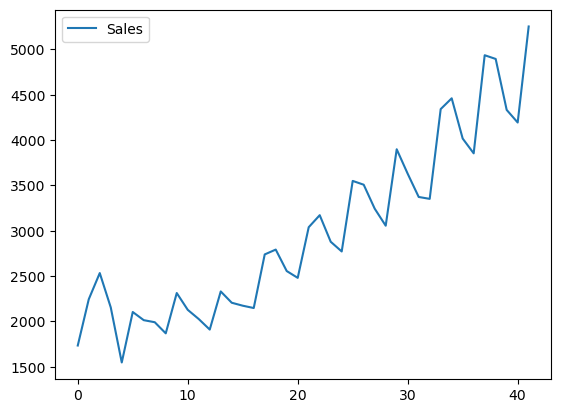

In [11]:
csr.plot()

<AxesSubplot:>

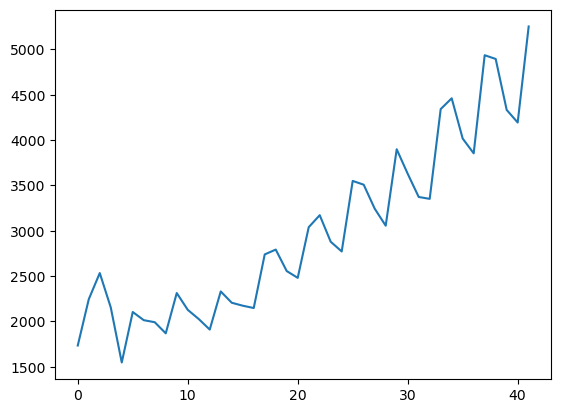

In [14]:
csr["Sales"].plot()

<AxesSubplot:ylabel='Count'>

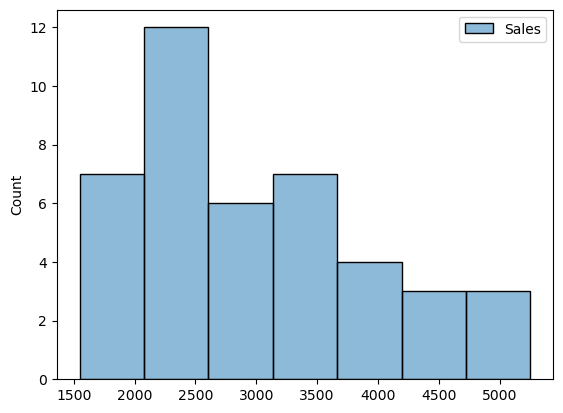

In [15]:
sns.histplot(data=csr)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

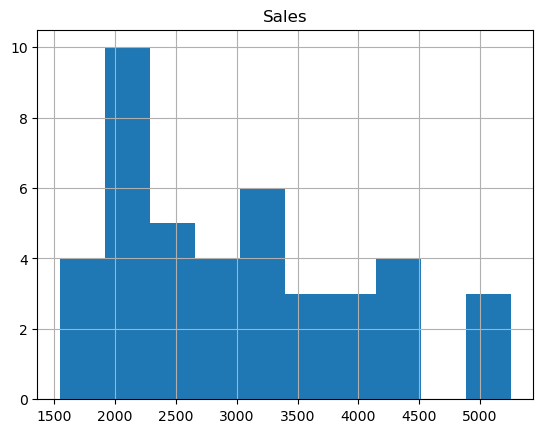

In [17]:
csr.hist()

<AxesSubplot:ylabel='Density'>

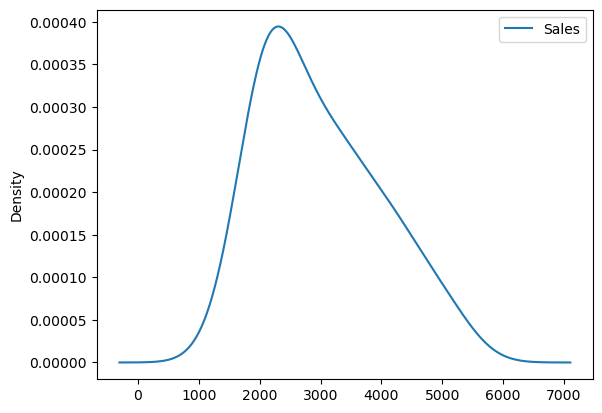

In [20]:
csr.plot(kind="kde")

In [21]:
np.array(csr["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

C:\Users\rasul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

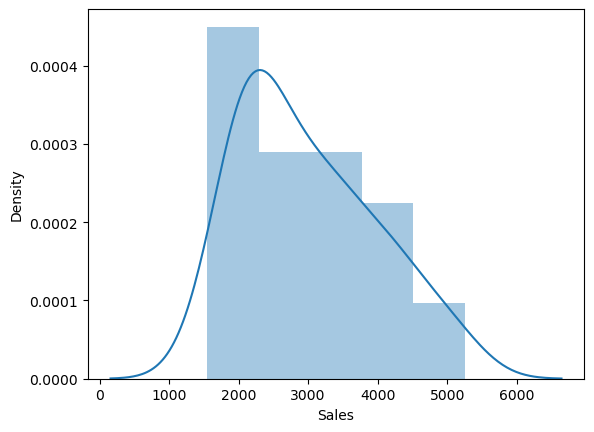

In [22]:
sns.distplot(csr['Sales'],kde=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

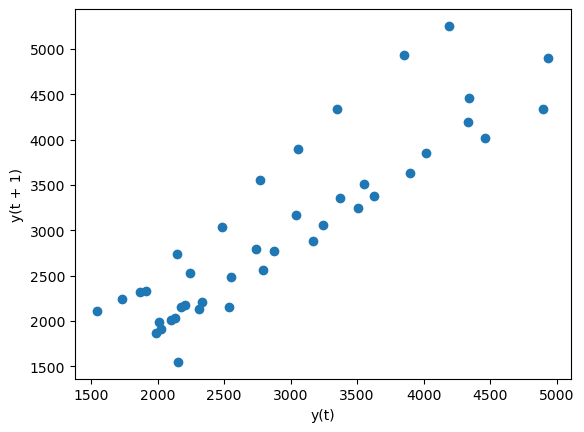

In [23]:
# lag_plot
from pandas.plotting import lag_plot
lag_plot(csr["Sales"])

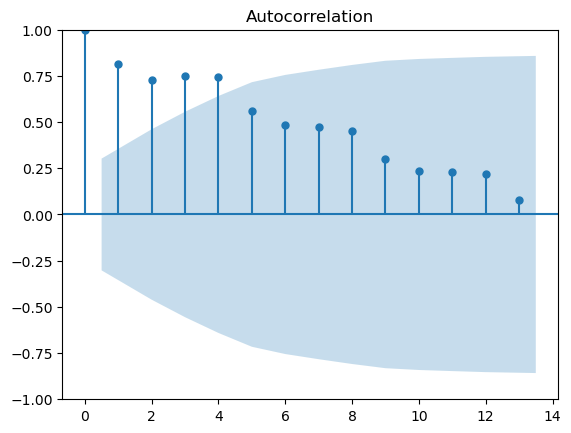

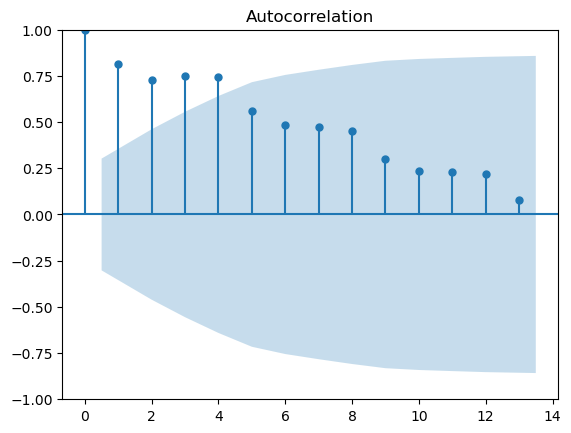

In [24]:
# Autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(csr["Sales"],lags=13)

In [25]:
# Data Preprocessing 
csr['quarter'] = 0
for i in range(42):
    x=csr['Quarter'][i]
    csr['quarter'][i]=x[0:2]


C:\Users\rasul\AppData\Local\Temp\ipykernel_25112\2011907815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csr['quarter'][i]=x[0:2]


In [26]:
csr.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [27]:
csr["quarter"].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [28]:
# Creat Dummies using pd.get_dummies()
cocacola_dummies=pd.DataFrame(pd.get_dummies(csr['quarter']),columns=['Q1','Q2','Q3','Q4'])
cocacola_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [29]:
dummy=pd.concat([csr,cocacola_dummies],axis= 1)
dummy.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [30]:
dummy['t'] = np.arange(1,43)
dummy['t_squared'] = dummy['t']**2
dummy['t_squared'].tail()

37    1444
38    1521
39    1600
40    1681
41    1764
Name: t_squared, dtype: int32

In [31]:
dummy["Sales_log"] =np.log(csr['Sales'])
dummy["Sales_log"].tail()

37    8.504311
38    8.495970
39    8.374015
40    8.341410
41    8.566555
Name: Sales_log, dtype: float64

In [32]:
dummy.head()


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [33]:
# Split the data into train and test 
train =dummy.head(32)
test =dummy.tail(10)
train,test

(   Quarter        Sales quarter  Q1  Q2  Q3  Q4   t  t_squared  Sales_log
 0    Q1_86  1734.827000      Q1   1   0   0   0   1          1   7.458663
 1    Q2_86  2244.960999      Q2   0   1   0   0   2          4   7.716443
 2    Q3_86  2533.804993      Q3   0   0   1   0   3          9   7.837477
 3    Q4_86  2154.962997      Q4   0   0   0   1   4         16   7.675529
 4    Q1_87  1547.818996      Q1   1   0   0   0   5         25   7.344602
 5    Q2_87  2104.411995      Q2   0   1   0   0   6         36   7.651791
 6    Q3_87  2014.362999      Q3   0   0   1   0   7         49   7.608058
 7    Q4_87  1991.746998      Q4   0   0   0   1   8         64   7.596767
 8    Q1_88  1869.049999      Q1   1   0   0   0   9         81   7.533186
 9    Q2_88  2313.631996      Q2   0   1   0   0  10        100   7.746574
 10   Q3_88  2128.320000      Q3   0   0   1   0  11        121   7.663088
 11   Q4_88  2026.828999      Q4   0   0   0   1  12        144   7.614228
 12   Q1_89  1910.603996 

In [34]:
# Build the models 
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [35]:
# fit Linear_Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_model

In [36]:
# predictions for linear_model
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_pred

32    3504.086233
33    3560.913734
34    3617.741235
35    3674.568736
36    3731.396237
37    3788.223738
38    3845.051239
39    3901.878740
40    3958.706241
41    4015.533742
dtype: float64

In [37]:
# Root_Mean_Square_Error(rmse) score
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767121

In [39]:
# fit Quadratic_Model 
qc_model =smf.ols("Sales~t+t_squared",data=train).fit()
qc_model

In [40]:
# Quadratic_Model predictions
qc_pred = pd.Series(qc_model.predict(test[['t','t_squared']]))
qc_pred

32    3899.007943
33    4027.639391
34    4160.494601
35    4297.573572
36    4438.876305
37    4584.402800
38    4734.153056
39    4888.127074
40    5046.324854
41    5208.746395
dtype: float64

In [41]:
# Root_Mean_Square_Error(rmse)
qc_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(qc_pred)))
qc_rmse

457.73573554073874

In [42]:
# fit Exponential model and predictions
exp_model = smf.ols("Sales_log~t",data=train).fit()
exp_pred = pd.Series(exp_model.predict(test['t']))
exp_pred

32    8.182657
33    8.204457
34    8.226258
35    8.248059
36    8.269860
37    8.291660
38    8.313461
39    8.335262
40    8.357062
41    8.378863
dtype: float64

In [43]:
# Root_Mean_Square_Error(rmse)
exp_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [44]:
print(linear_rmse.round(3),
      qc_rmse.round(3),
      exp_rmse.round(3)) 

752.923 457.736 4387.941


In [45]:
data_new = {"MODEL":pd.Series(["linear_rmse","exp_rmse","quad_rmse"]),
        "RMSE_Values":pd.Series([linear_rmse,exp_rmse,qc_rmse,])}
print(data_new)

{'MODEL': 0    linear_rmse
1       exp_rmse
2      quad_rmse
dtype: object, 'RMSE_Values': 0     752.923393
1    4387.940545
2     457.735736
dtype: float64}


In [46]:
rmse_table=pd.DataFrame(data_new)
rmse_table

,MODEL,RMSE_Values
0,linear_rmse,752.923393
1,exp_rmse,4387.940545
2,quad_rmse,457.735736


In [48]:
# Using ARIMA Model
df = pd.read_excel("CocaCola_Sales_Rawdata (2).xlsx",header=0,index_col=0, parse_dates=True)
df.head() 

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [49]:
#separate out a validation dataset
split_point = len(df) - 7
dataset_cc, validation_cc = df[0:split_point], df[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [50]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [51]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train.head()

C:\Users\rasul\AppData\Local\Temp\ipykernel_25112\2723529682.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: 1, dtype: float64

In [53]:
x = train.values
x = x.astype('float32')
train_size = int(len(x) * 0.50)
train, test = x[0:train_size], x[train_size:]

In [54]:
# Model Validation 
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000


In [55]:
history

[1734.827,
 2244.961,
 2533.805,
 2154.963,
 1547.819,
 2104.412,
 2014.363,
 1991.747,
 1869.05,
 2313.632,
 2128.32,
 2026.829,
 1910.604,
 2331.165,
 2206.55,
 2173.968,
 2148.278,
 2739.308,
 2792.754,
 2556.01,
 2480.9739,
 3039.523,
 3172.116,
 2879.001,
 2772.0,
 3550.0,
 3508.0,
 3243.86,
 3056.0,
 3899.0,
 3629.0,
 3373.0,
 3352.0,
 4342.0,
 4461.0]

In [56]:
# report performance of Root_Mean_Square_Error(rmse)
rmse = sqrt(mean_squared_error(test, predictions))
rmse

434.40066470943617

In [57]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),
        "RMSE_Values":pd.Series([linear_rmse,exp_rmse,qc_rmse,rmse])}
rmse_table=pd.DataFrame(data)
rmse_table

,MODEL,RMSE_Values
0,rmse_linear,752.923393
1,rmse_exp,4387.940545
2,rmse_quad,457.735736
3,RMSE_ARIMA,434.400665


In [58]:
# Perfom the Airelines_Data 
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [60]:
airlines = pd.read_excel("Airlines+Data (2).xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [63]:
airlines.shape

(96, 2)

In [64]:
airlines['Month']=pd.to_datetime(airlines['Month'], infer_datetime_format=True)
airlines=airlines.set_index(['Month'])

In [65]:
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


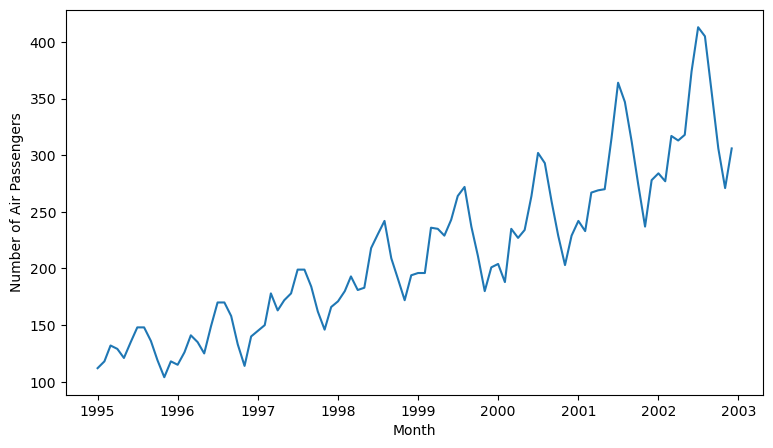

In [66]:
# VISUALISATION or GRAPHS 
plt.figure(figsize=(9,5))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(airlines)

In [67]:
rolmean=airlines.rolling(window=12).mean()
rolstd=airlines.rolling(window=12).std()
print(rolmean.head(13),rolstd.head(13))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342


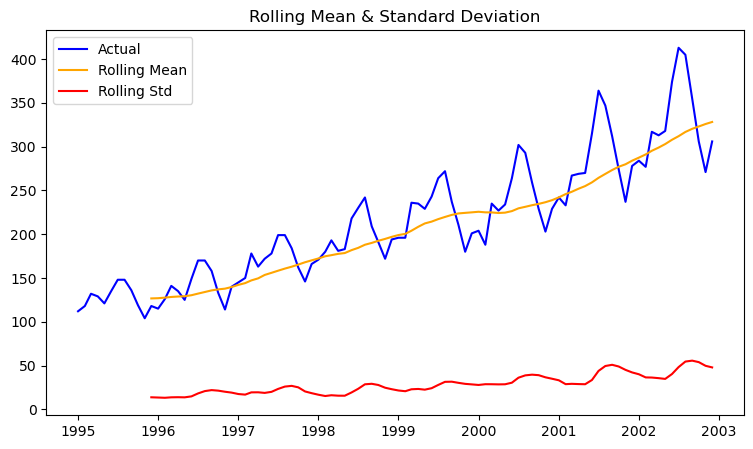

In [68]:
plt.figure(figsize=(9,5))
actual=plt.plot(airlines, color='blue', label='Actual')
mean_6=plt.plot(rolmean, color='orange', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='red', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [69]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(airlines['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


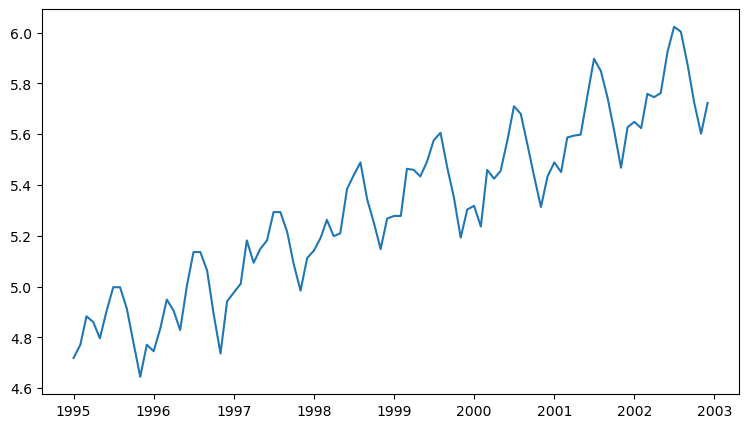

In [70]:
# data_log plot
plt.figure(figsize=(9,5)) 
data_log=np.log(airlines)
plt.plot(data_log)

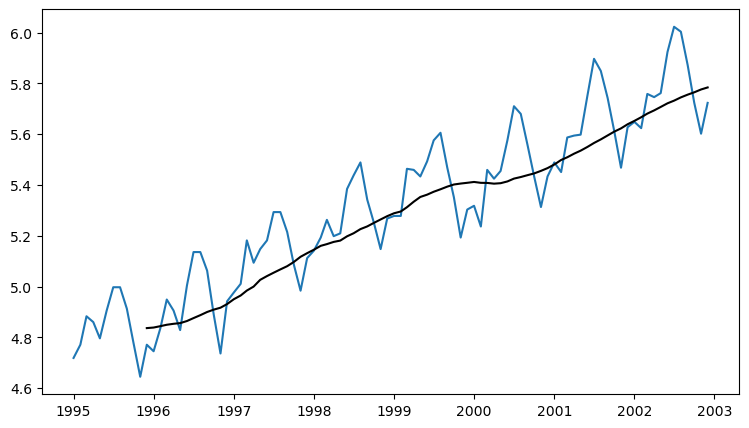

In [71]:
plt.figure(figsize=(9,5))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='black')

In [72]:
data_log_diff=data_log-MAvg
data_log_diff.head()

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN


In [73]:
data_log_diff=data_log_diff.dropna() 
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


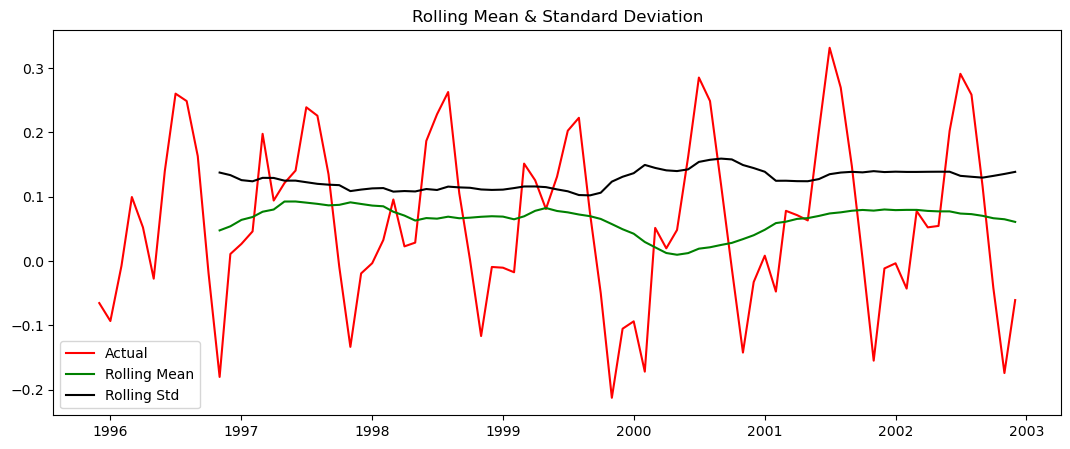

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [74]:
# using Stationarity 
def stationarity(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    plt.figure(figsize=(13,5)) 
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
stationarity(data_log_diff)

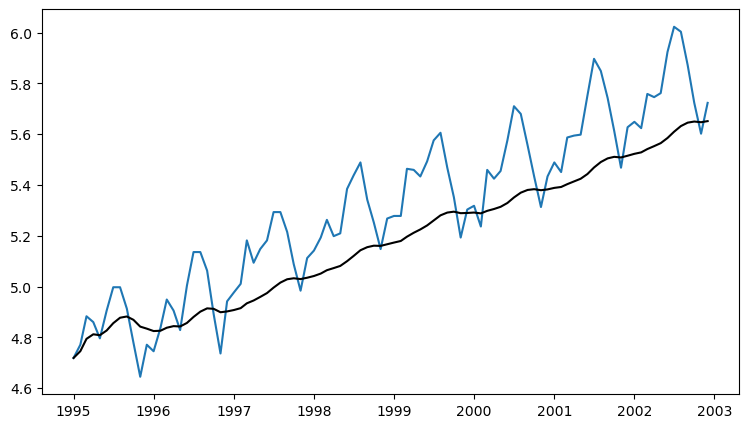

In [75]:
# exp_data plot
plt.figure(figsize=(9,5)) 
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

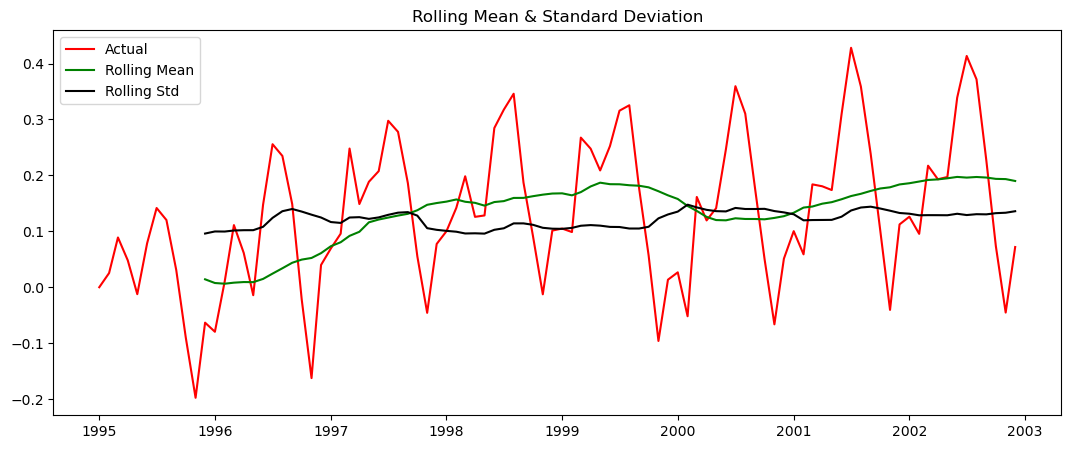

Dickey-Fuller Test: 
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [76]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

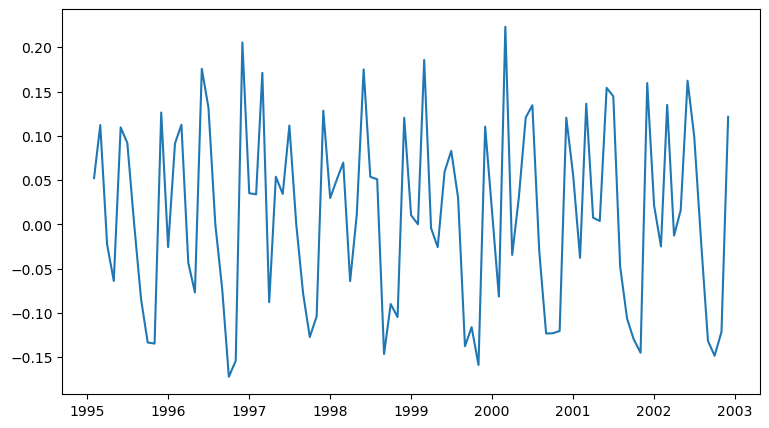

In [77]:
plt.figure(figsize=(9,5))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

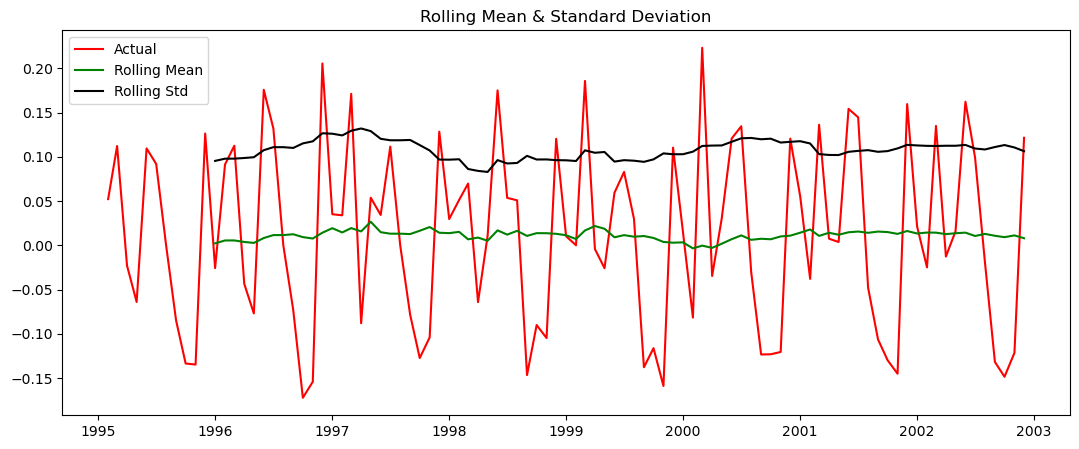

Dickey-Fuller Test: 
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No. of Obs              82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [78]:
data_shift=data_shift.dropna()
stationarity(data_shift)

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)
decomp

In [80]:
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid
print(trend,seasonal,residual)

Month
1995-01-01   NaN
1995-02-01   NaN
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
              ..
2002-08-01   NaN
2002-09-01   NaN
2002-10-01   NaN
2002-11-01   NaN
2002-12-01   NaN
Name: trend, Length: 96, dtype: float64 Month
1995-01-01   -0.084389
1995-02-01   -0.091917
1995-03-01    0.043997
1995-04-01   -0.001598
1995-05-01   -0.011229
                ...   
2002-08-01    0.178997
2002-09-01    0.061540
2002-10-01   -0.076431
2002-11-01   -0.219193
2002-12-01   -0.092309
Name: seasonal, Length: 96, dtype: float64 Month
1995-01-01   NaN
1995-02-01   NaN
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
              ..
2002-08-01   NaN
2002-09-01   NaN
2002-10-01   NaN
2002-11-01   NaN
2002-12-01   NaN
Name: resid, Length: 96, dtype: float64


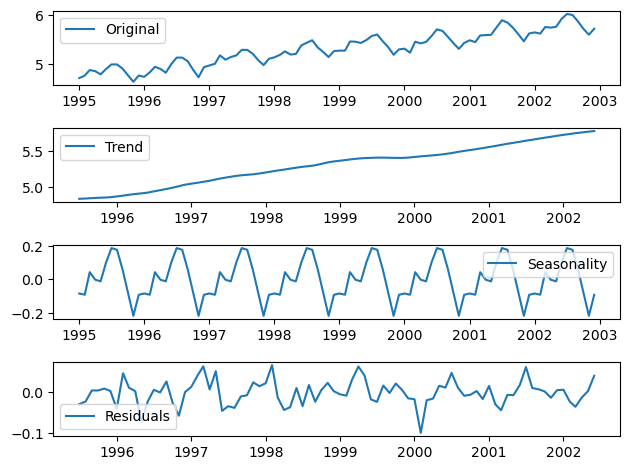

In [81]:
# plot actual,trend,seasonal and residuals
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

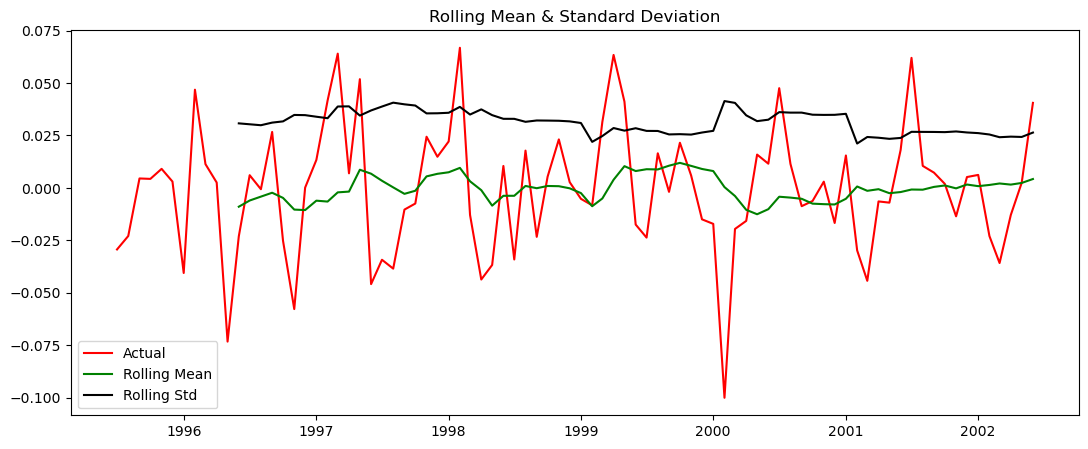

Dickey-Fuller Test: 


KeyError: 'Passengers'

In [82]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

In [83]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
lag_acf=acf(data_shift, nlags=15)
lag_pacf=pacf(data_shift, nlags=15, method='ols')
print(lag_acf,lag_pacf)

[ 1.          0.15774611 -0.16225909 -0.13691043 -0.31183779 -0.05864536
  0.11732485 -0.11095953 -0.32470612 -0.08896699 -0.13674091  0.17074393
  0.78507485  0.16121148 -0.17538423 -0.08608497] [ 1.          0.15965239 -0.20094318 -0.08783845 -0.3555372  -0.00308793
 -0.00276873 -0.24193695 -0.51365981 -0.24106498 -0.59751694 -0.54083168
  0.53710505  0.27248271 -0.11919288  0.19282807]


Text(0.5, 1.0, 'Autocorrelation Function')

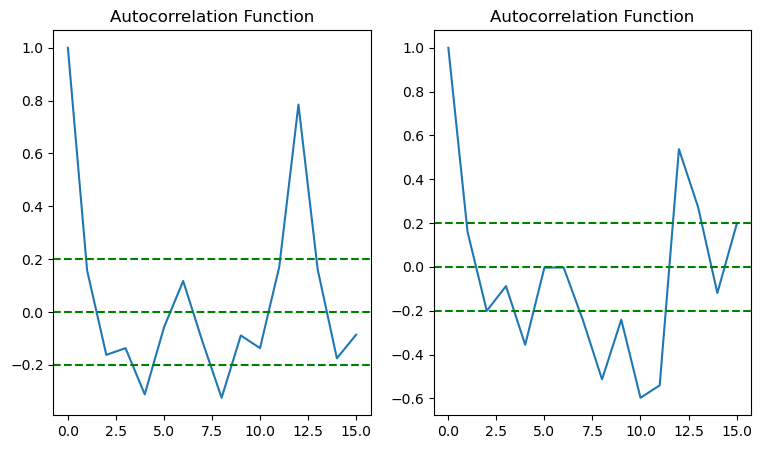

In [84]:
# plot Autocorrelation Function 
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plot ARIMA model


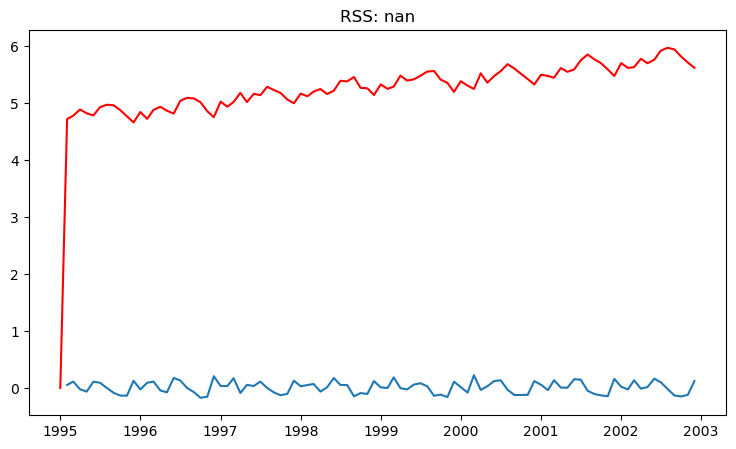

In [85]:
# Using ARIMA model
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data_log, order=(1,1,2))
results = model.fit()
plt.figure(figsize=(9,5))
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plot ARIMA model')

In [86]:
# Predictions 
predictions=pd.Series(results.fittedvalues, copy=True)
predictions.head()

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.778042
1995-04-01    4.887683
1995-05-01    4.820752
dtype: float64

In [87]:
predictions_cum_sum=predictions.cumsum()
predictions_cum_sum.head()

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.496541
1995-04-01    14.384224
1995-05-01    19.204976
dtype: float64

In [88]:
predictions_log=pd.Series(data_log['Passengers'])
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.tail()

Month
2002-08-01    485.770980
2002-09-01    491.580350
2002-10-01    497.249940
2002-11-01    502.840038
2002-12-01    508.580414
dtype: float64

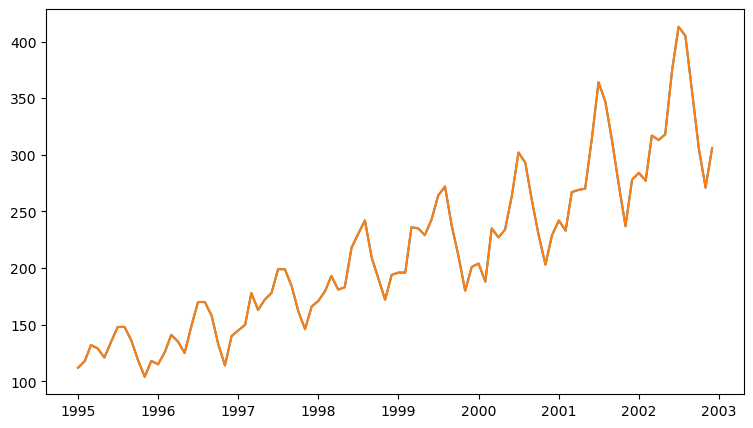

In [89]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(9,5))
plt.plot(airlines)
plt.plot(predictions_ARIMA)

In [90]:
results.forecast(steps=143)

2003-01-01    5.790191
2003-02-01    5.781039
2003-03-01    5.776536
2003-04-01    5.774319
2003-05-01    5.773229
                ...   
2014-07-01    5.772172
2014-08-01    5.772172
2014-09-01    5.772172
2014-10-01    5.772172
2014-11-01    5.772172
Freq: MS, Name: predicted_mean, Length: 143, dtype: float64